In [1]:
#Mount Drive
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [3]:
#See the data
dataframe = pd.read_csv('/content/drive/MyDrive/Tugas JST_2/LSTM/Univariate/train_csv.csv', usecols=[2], engine='python')
dataset = dataframe.values
dataframe

,feature
0,237.97
1,57.93
2,90.53
3,260.75
4,49.70
...,...
75,469.72
76,406.79
77,128.91
78,85.28


In [4]:
# MinMax scaling for 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
len(dataset)

80

In [5]:
# splitting the 80% training and 20% testing
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

64 16


In [7]:
# function for pre processing data for RNN.
def create_dataset(dataset, no_seq=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-no_seq-1):
        a = dataset[i:(i+no_seq), 0]
        dataX.append(a)
        dataY.append(dataset[i + no_seq, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
# with number of sequence=1, splitting of data takes place. 
no_seq = 1
trainX, trainY = create_dataset(train, no_seq)
testX, testY = create_dataset(test, no_seq)
print(len(trainX),len(trainY))
print(len(testX),len(testY))

62 62
14 14


In [9]:
#Reshape dataset
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
#Make Model

model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(1, no_seq)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model_url = '/content/drive/MyDrive/Tugas JST_2/LSTM/Univariate/univariate.h5'
model.save(model_url)
print("Saved")

Saved


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#compile
model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
#Evaluation, replace with 1, if you want to display the epoch
model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
2/2 [==============================] - 21s 13ms/step - loss: 0.0956
Epoch 2/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0886
Epoch 3/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0802
Epoch 4/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0736
Epoch 5/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0600
Epoch 6/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0634
Epoch 7/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0526
Epoch 8/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0428
Epoch 9/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0392
Epoch 10/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0377
Epoch 11/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0372
Epoch 12/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0352
Epoch 13/50
2/2 [==============================] - 0s 11ms/st

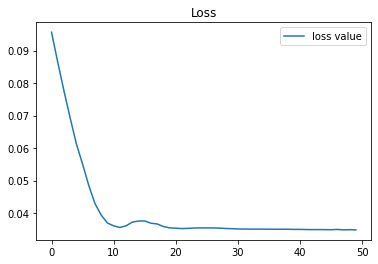

In [16]:
#show the graph of loss function
plt.title('Loss')
plt.plot(model.history.history['loss'], label='loss value')
plt.legend()
plt.show()

Train Score: 83.67 RMSE
Test Score: 123.87 RMSE


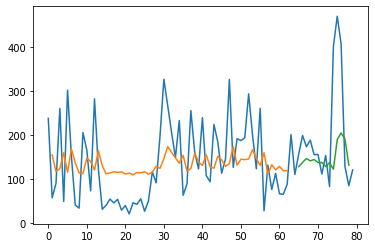

In [17]:
#Prediction use RSME
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[no_seq:len(trainPredict)+no_seq, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(no_seq*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [18]:
#Predict Future
inference_data = pd.read_csv('/content/drive/MyDrive/Tugas JST_2/LSTM/Univariate/test_csv.csv')

No_test_data = len(inference_data)

# Number of features to be found.
print(No_test_data)

40


In [19]:
# Prediction taking the last dataset of train and predicting the rest 39 features.

for i in range(79, 79+No_test_data):
    
    # last day of the training dataset.
    if i == 79:
        last_day = dataframe[i:i+1].values
        last_day = scaler.transform(last_day)
        X_test = []
        X_test.append(last_day)
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        pred_price = model.predict(X_test)
        pred_price = scaler.inverse_transform(pred_price)
        print(pred_price)
        
    # rest 39 features.   
    else:
        last_day = pred_value
        last_day = scaler.transform(last_day)
        X_test = []
        X_test.append(last_day)
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        pred_price = model.predict(X_test)
        pred_price = scaler.inverse_transform(pred_price)
        print(pred_price)
        
    # replacing the old prediction value with new for next feature prediction.
    pred_value = pred_price

[[130.62375]]
[[132.59888]]
[[133.0098]]
[[133.0953]]
[[133.1131]]
[[133.11682]]
[[133.11758]]
[[133.11775]]
[[133.11778]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
[[133.1178]]
